# Data Preparation

Dataset: <a href="https://www.kaggle.com/new-york-city/nyc-property-sales/downloads/nyc-property-sales.zip/1">NYC Property Sales</a><br>
Filename: nyc-rolling-sales.csv<br>
Target Variable: SALE PRICE


<table>
  <tr>
    <th>Feature_Name</th>
    <th>Feature_Type</th>
  </tr>
  <tr>
    <td>Unnamed: 0</td>
    <td>Unknown</td>
  </tr>
  <tr>
    <td>BOROUGH</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>NEIGHBORHOOD</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>BUILDING CLASS CATEGORY</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>TAX CLASS AT PRESENT</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>BLOCK</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>LOT</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>EASE-MENT</td>
    <td>Unknown</td>
  </tr>
  <tr>
    <td>BUILDING CLASS AT PRESENT</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>ADDRESS</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>APARTMENT NUMBER</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>ZIP CODE</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>RESIDENTIAL UNITS</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>COMMERCIAL UNITS</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>TOTAL UNITS</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>LAND SQUARE FEET</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>GROSS SQUARE FEET</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>YEAR BUILT</td>
    <td>NUMERICAL</td>
  </tr>
  <tr>
    <td>TAX CLASS AT TIME OF SALE</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>BUILDING CLASS AT TIME OF SALE</td>
    <td>CATEGORICAL</td>
  </tr>
  <tr>
    <td>SALE PRICE</td>
    <td>NUMERICAL (TARGET)</td>
  </tr>
  <tr>
    <td>SALE DATE</td>
    <td>DATETIME</td>
  </tr>
</table>

## Import Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [41]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
from scipy.stats import norm
from scipy import stats

________

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [43]:
df = pd.read_csv("./nyc-rolling-sales.csv")

View the Dataset

In [44]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Check the Shape

In [45]:
df.shape

(84548, 22)

## Ensure Columns / Features have Proper Labels

Remove any columns that have not been labelled properly or are of unknown feature type

In [46]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [47]:
# REPLACING SPACES WITH UNDERSCORE FOR PROPER LABEL
correct_col_names = []

# REMOVING NOT LABELLED PROPERLY OR UNKNOWN FEATURE TYPES
to_be_removed_col = ['Unnamed: 0', 'EASE-MENT']
df.drop(to_be_removed_col, axis=1, inplace=True)

for col_name in df.columns:
    splitted_name = col_name.split(' ')
    if len(splitted_name) == 1:
        correct_col_names.append(col_name)
    else:
        joined_name = '_'.join(splitted_name)
        correct_col_names.append(joined_name)

# REASSIGN COLUMN HEADERS
df.columns = correct_col_names

## Ensure Correct Format of Values

Use the table above as reference

In [48]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING_CLASS_CATEGORY           object
TAX_CLASS_AT_PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING_CLASS_AT_PRESENT         object
ADDRESS                           object
APARTMENT_NUMBER                  object
ZIP_CODE                           int64
RESIDENTIAL_UNITS                  int64
COMMERCIAL_UNITS                   int64
TOTAL_UNITS                        int64
LAND_SQUARE_FEET                  object
GROSS_SQUARE_FEET                 object
YEAR_BUILT                         int64
TAX_CLASS_AT_TIME_OF_SALE          int64
BUILDING_CLASS_AT_TIME_OF_SALE    object
SALE_PRICE                        object
SALE_DATE                         object
dtype: object

## Remove Duplicates

Check if there are duplicated rows


In [49]:
df.duplicated().sum()

765

Remove the duplicates if any

In [50]:
df.drop_duplicates(inplace=True)

Check if the rows are dropped

In [51]:
df.shape

(83783, 20)

## Handle Missing Data

Hint: You may have to use the describe function to properly handle missing values for this dataset
<br>




For the Target Variable:
Many sales occur with a nonsensically small dollar amount: USD0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement. For our purposes, let's remove any sale price that is less than USD10,000.00

In [52]:
df['SALE_PRICE'] = df['SALE_PRICE'].str.replace('-', '0')

In [53]:
df['SALE_PRICE'] = df['SALE_PRICE'].astype(np.int64)

In [54]:
df.drop(df[df['SALE_PRICE'] < 10000].index, inplace=True)

In [55]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


_______

## Remove Outliers

### Univariate

Check the Distribution of the Target Column

<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

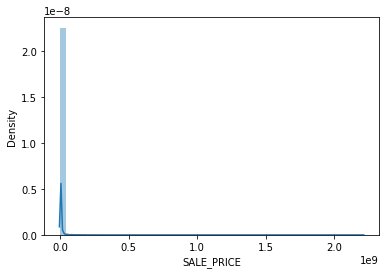

In [56]:
sns.distplot(df['SALE_PRICE'])

<AxesSubplot:xlabel='SALE_PRICE'>

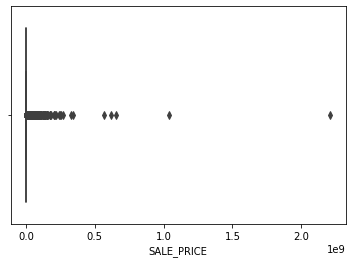

In [57]:
sns.boxplot(df['SALE_PRICE'], orient='v')

Remove outliers using any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR



*The interquartile range (IQR), is equal to the difference between 75th and 25th percentiles 
IQR = Q3 − Q1.*

<a href="https://en.wikipedia.org/wiki/Interquartile_range">More information</a>

View the changes in distribution after removing the outliers

In [59]:
Q1 = df['SALE_PRICE'].quantile(0.25)
Q1

389153.0

In [60]:
Q3 = df['SALE_PRICE'].quantile(0.75)
Q3

1100000.0

In [61]:
IQR = Q3 - Q1

In [62]:
print("Q1 : %i" %Q1)
print("Q3 : %i" %Q3)
print("IQR : %i" %IQR)

Q1 : 389153
Q3 : 1100000
IQR : 710847


In [63]:
(Q1 - 1.5 * IQR)

-677117.5

In [64]:
(Q3 + 1.5 * IQR)

2166270.5

In [65]:
df_out = df[~((df['SALE_PRICE'] < (Q1 - 1.5 * IQR)) | (df['SALE_PRICE'] > (Q3 + 1.5 * IQR)))]

In [66]:
df_out.shape

(52106, 20)

In [67]:
df.shape[0] - df_out.shape[0]

6227

<AxesSubplot:xlabel='SALE_PRICE'>

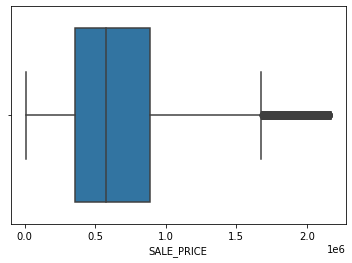

In [68]:
sns.boxplot(df_out['SALE_PRICE'], orient='v')

<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

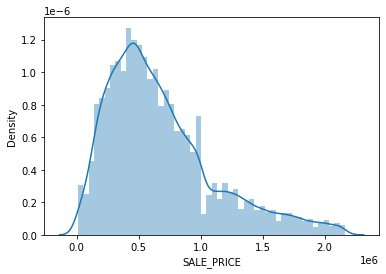

In [69]:
sns.distplot(df_out['SALE_PRICE'])

______

## Split into Numerical, Categorical, and Target

In [70]:
#categorical
df_cat = df.select_dtypes(include=['object'])

#numerical
df_num = df.select_dtypes(include=['int64', 'float64'])

#target
df_target = df['SALE_PRICE']

_______

## Scale the Numerical Features

Scale using the Robust Scaler

In [74]:
df_num.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,58333.00,58333.00,58333.00,58333.00,58333.00,58333.00,58333.00,58333.00,58333.00,58333.00
mean,2.94,4141.66,391.83,10708.24,1.70,0.15,1.87,1812.31,1.63,1528210.38
std,1.33,3566.57,670.68,1249.31,14.15,9.77,17.31,502.14,0.70,12471035.81
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,10000.00
25%,2.00,1274.00,21.00,10280.00,0.00,0.00,0.00,1920.00,1.00,389153.00
50%,3.00,3152.00,50.00,11207.00,1.00,0.00,1.00,1940.00,2.00,640000.00
75%,4.00,6099.00,1002.00,11357.00,1.00,0.00,2.00,1966.00,2.00,1100000.00
max,5.00,16319.00,9106.00,11694.00,1844.00,2261.00,2261.00,2017.00,4.00,2210000000.00


In [75]:
from sklearn.preprocessing import RobustScaler

In [76]:
df_num.head()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
0,1,392,6,10009,5,0,5,1900,2,6625000
3,1,402,21,10009,10,0,10,1913,2,3936272
4,1,404,55,10009,6,0,6,1900,2,8000000
6,1,406,32,10009,8,0,8,1920,2,3192840
9,1,387,153,10009,24,0,24,1920,2,16232000


In [77]:
scaler = RobustScaler()

In [79]:
#we also have the option to apply a fit transform function of performing these steps separately
scaled_values = scaler.fit_transform(df_num)

#transform the df_num
df_num_scaled = pd.DataFrame(scaled_values, columns=df_num.columns, index=df_num.index)

In [80]:
df_num_scaled.head()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
0,-1.00,-0.57,-0.04,-1.11,4.00,0.00,2.00,-0.87,0.00,8.42
3,-1.00,-0.57,-0.03,-1.11,9.00,0.00,4.50,-0.59,0.00,4.64
4,-1.00,-0.57,0.01,-1.11,5.00,0.00,2.50,-0.87,0.00,10.35
6,-1.00,-0.57,-0.02,-1.11,7.00,0.00,3.50,-0.43,0.00,3.59
9,-1.00,-0.57,0.10,-1.11,23.00,0.00,11.50,-0.43,0.00,21.93


<AxesSubplot:xlabel='BOROUGH', ylabel='Density'>

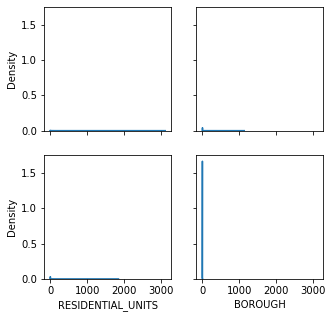

In [83]:
f, axes = plt.subplots(2, 2, figsize=(5, 5), sharex=True,sharey=True)
sns.distplot(df_num_scaled['SALE_PRICE'], hist=False, ax=axes[0,0])
sns.distplot(df_num_scaled['TOTAL_UNITS'], hist=False, ax=axes[0,1])
sns.distplot(df_num_scaled['RESIDENTIAL_UNITS'], hist=False,ax=axes[1,0])
sns.distplot(df_num_scaled['BOROUGH'], hist=False, ax=axes[1,1])

_______

## Manage Categorical Variables

Get the statistics for Categorical columns
* Drop those with more than 1000 unique values.
* Drop also the features that would not be known at the time of sale. 
    * Features with "AT PRESENT" tags

In [85]:
df_cat.describe(include='object')

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_DATE
count,58333,58333,58333,58333,58333,58333,58333,58333,58333,58333
unique,253,46,10,153,48517,3012,4757,4454,153,335
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,2,D4,131-05 40TH ROAD,,-,-,D4,2017-06-29 00:00:00
freq,2159,12649,25643,11293,209,45066,20978,21502,11295,406


 Convert Categories to Number 

_______

# Save the final dataset as a CSV File

### Check if it loads correctly